In [2]:
import torch
import torch.nn as nn
import utils as ut
from torch_lr_finder import LRFinder
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import WeightedRandomSampler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

bs = 64
num_epochs = 50
lr = 1.0e-3

# dataset and data loader
dstr = ut.RumexDataset("data/10m/256/train_wa/")
dltr = ut.train_loader(dstr, bs)
loss_fn = nn.CrossEntropyLoss(reduction="mean")

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


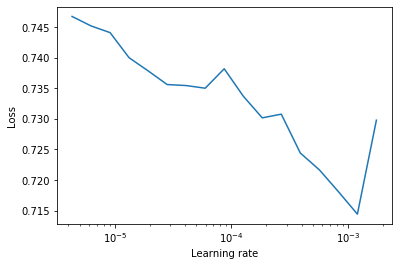

In [2]:
model_name = 'alexnet'
model = ut.RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=10, num_iter=50, step_mode="exp")
lr_finder.plot()

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


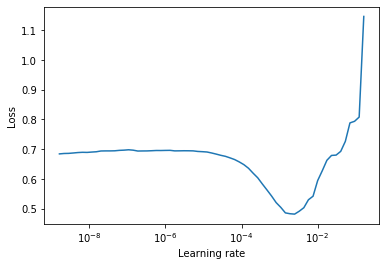

In [2]:
model_name = 'resnet'
model = ut.RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=10, num_iter=100, step_mode="exp")
lr_finder.plot()

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


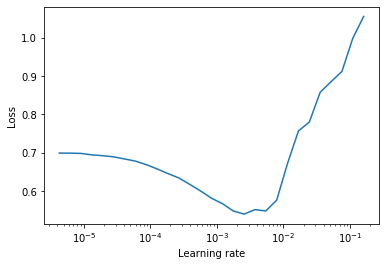

In [6]:
model_name = 'resnet'
model = ut.RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=10, num_iter=50, step_mode="exp")
lr_finder.plot()

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


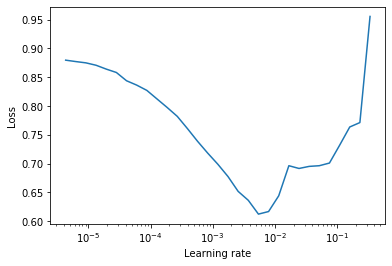

In [4]:
model_name = 'densenet'
model = ut.RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=10, num_iter=50, step_mode="exp")
lr_finder.plot()

In [3]:
model_name = 'mobilenet'
model = ut.RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=10, num_iter=50, step_mode="exp")
lr_finder.plot()

NameError: name 'RumexNet' is not defined

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



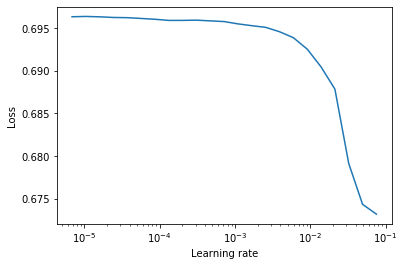

In [2]:
model_name = 'shufflenet'
model = ut.RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=100, num_iter=50, step_mode="exp")
lr_finder.plot()

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


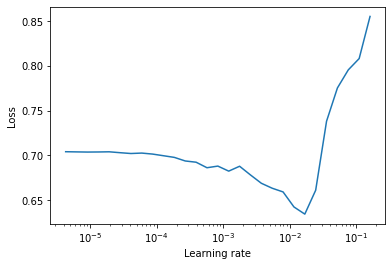

<AxesSubplot:xlabel='Learning rate', ylabel='Loss'>

In [4]:
model_name = 'mnasnet'
model = ut.RumexNet(model_name)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=10, num_iter=50, step_mode="exp")
lr_finder.plot()

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


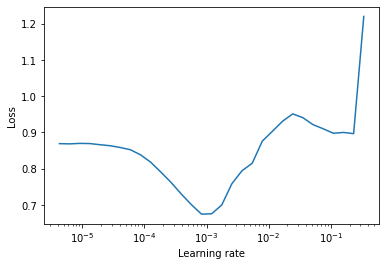

<AxesSubplot:xlabel='Learning rate', ylabel='Loss'>

In [3]:
model = ut.RumexNet('wide_resnet')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=10, num_iter=50, step_mode="exp")
lr_finder.plot()

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


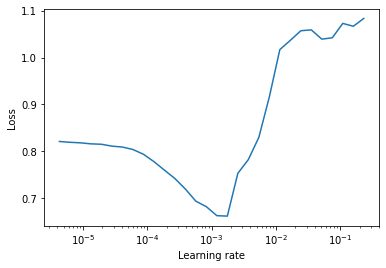

<AxesSubplot:xlabel='Learning rate', ylabel='Loss'>

In [4]:
model = ut.RumexNet('resnext')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, loss_fn)
lr_finder.range_test(dltr, end_lr=10, num_iter=50, step_mode="exp")
lr_finder.plot()

In [3]:
model = ut.RumexNet('resnext')
print(model)

RumexNet(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequen